In [ ]:
import random # generate random number
import numpy as np # numberical computing
import networkx as nx # creating, manipulating, and studying complex networks or graphs
import matplotlib.pyplot as plt # creating visualizations and plots

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)
print(reward_matrix)
# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0
# Print the reward matrix
print('\n\n')
print("Reward Matrix:")
print(reward_matrix)


[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]



Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


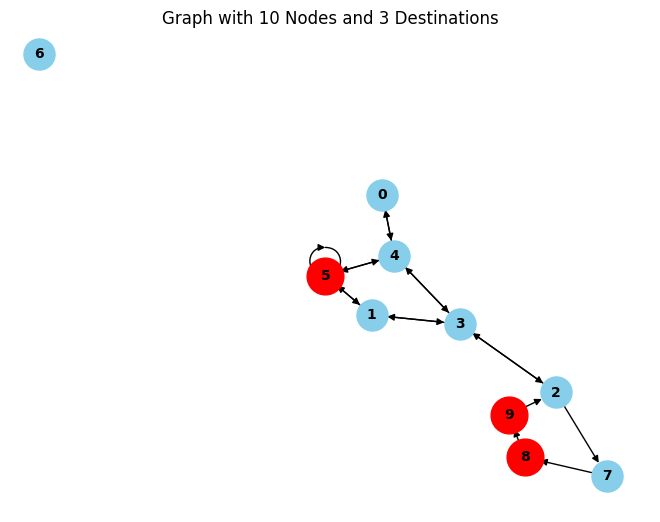

In [ ]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=10)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

In [ ]:
# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))
print(Q_matrix)
# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = [] #Lists are initialized to store the Q-matrix after each episode and to track the average Q-values.
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))


# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)
print('\n\n')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]





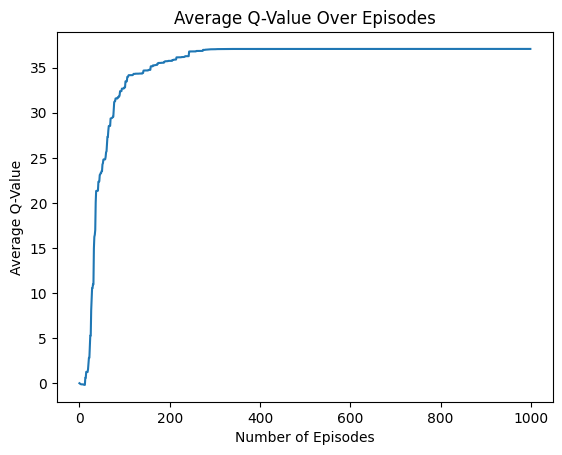

In [ ]:
# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()
print('\n\n')

In [ ]:
# Find the best path to one of the destination nodes
starting_node = 3  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)



Best path from node 3 to one of the destinations: [3, 1, 5]


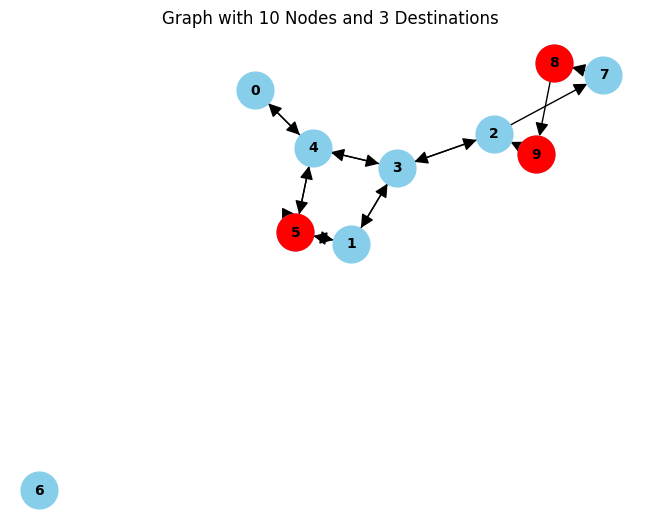

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


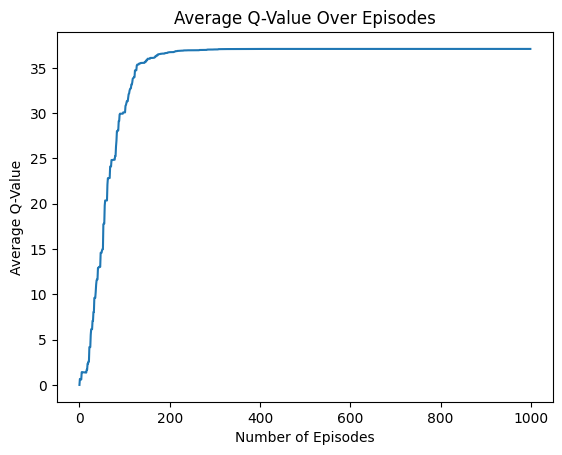


Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]

Best path from node 1 to one of the destinations: [1, 5]


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 1  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


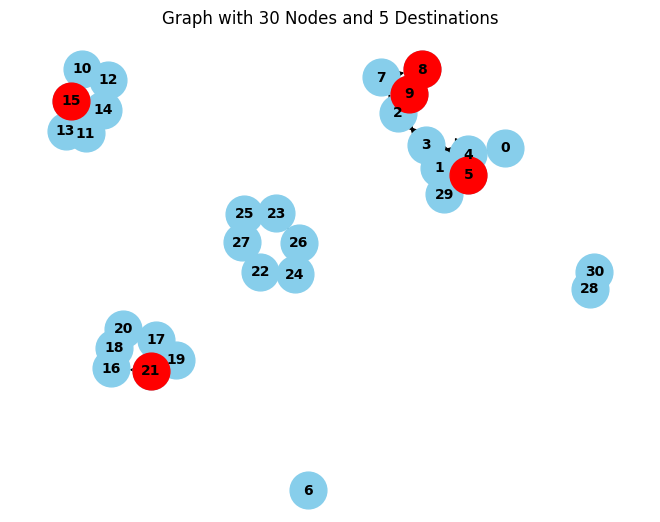

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  

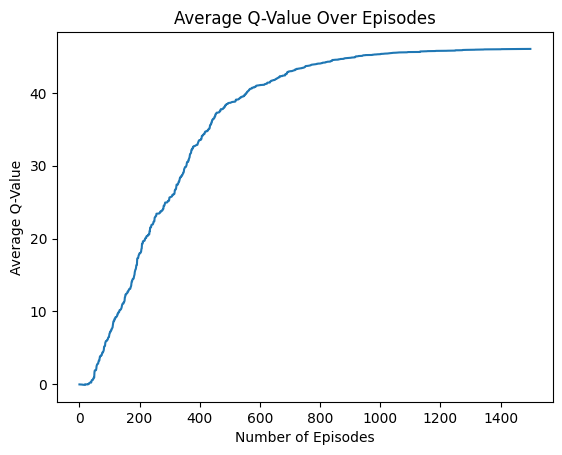


Final Q-matrix:
[[62.84488311 78.98894899 62.99838542 62.68282231 79.96948385 -0.99999998
  62.19845675 78.99967617 -0.9999999  -0.99999998 61.95990535 62.87848992
  62.1999686  78.99997671 62.15887238 -0.9984     62.19992255 62.95591747
  62.19516395 78.99995356 62.19286999 -0.99999949 62.19919041 62.1974081
  62.19958787 62.19896063 62.19971353 62.18087666 62.19797435 62.84729699]
 [62.96864608 78.98553467 62.99973461 63.94422729 78.97433994 99.99872
  62.19989964 78.99958863 -0.9999999  -1.         62.1429338  62.4258001
  62.19937481 78.994794   62.1967394  -1.         62.17079719 62.98801652
  62.19755371 78.99999155 62.19987705 -0.99999744 62.1983918  62.19964804
  62.19663121 62.16409271 62.1950033  62.19065151 62.19470258 62.98519967]
 [62.86524215 78.98996473 62.99961943 63.85886635 78.9743984  -1.
  62.19994028 79.99968248 -0.9999872  -0.9999999  62.18241945 61.82044426
  62.19893061 78.99971597 62.19598549 -1.         62.19995034 62.99463129
  62.18838876 63.195904   62.199

In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 30
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
# You may customize the edges based on your specific graph structure
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3),
         (4, 5), (5, 4), (5, 5), (2, 7), (7, 8), (8, 9), (9, 2), (10, 12), (11, 13),
         (12, 14), (13, 15), (14, 11), (15, 10), (16, 18), (17, 19), (18, 20),
         (19, 21), (20, 17), (21, 16), (22, 24), (23, 25), (24, 26), (25, 27),
         (26, 23), (27, 22), (28, 30), (29, 1), (30, 28)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8, 15, 21]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 30 Nodes and 5 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1500  # Adjust the number of episodes as needed

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 20  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


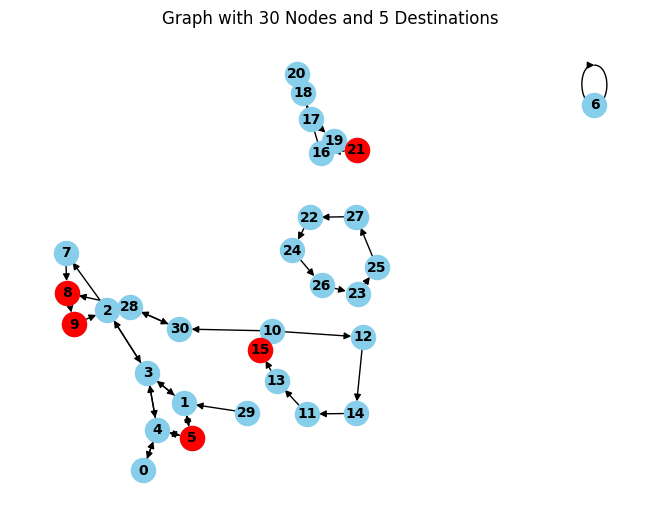

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.  -1.  -1.]
 [ -1.  -1.  

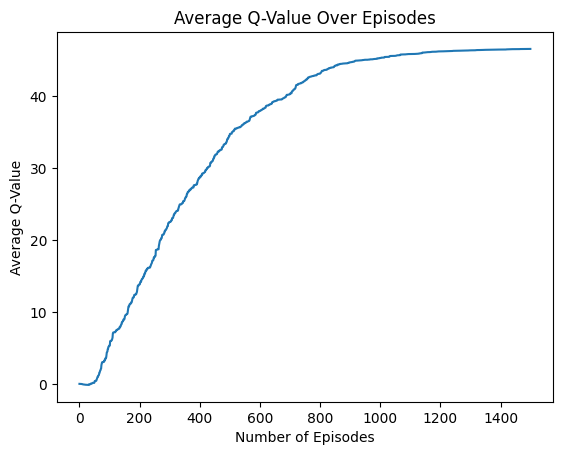

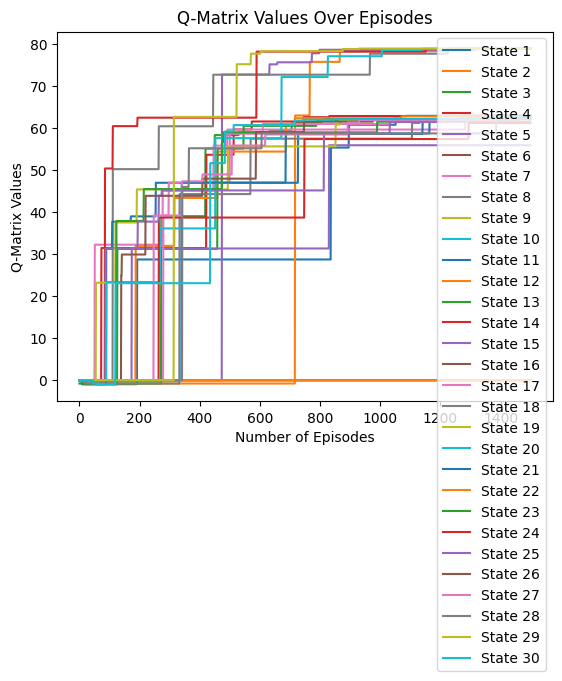


Final Q-matrix:
[[62.99312354 78.95123018 62.94735042 62.97789145 79.99444037 -0.9999872
  62.1948018  78.99128832 -0.999936   -1.         62.19841251 62.98691452
  62.19332514 78.99775304 62.19828331 -0.99999949 62.1896084  62.60569149
  62.03365878 78.83935928 62.1954052  -0.9999872  62.19969891 62.18989281
  62.13598186 61.87932115 62.17165695 62.19987927 78.99442176 62.85799895]
 [62.99546333 78.96929444 62.94949961 63.97951042 78.99951466 99.968
  62.19432674 78.99983316 -0.9999999  -0.999936   62.14428626 62.99212896
  62.17944053 78.98501932 62.19846848 -0.9999999  62.19570533 62.19223446
  62.1905117  78.99299226 62.19195543 -0.99999998 62.19907756 62.19811258
  62.19275655 62.19694208 62.19410442 62.19084802 78.99952362 62.96471568]
 [62.99101515 78.84650496 62.94872924 63.97950711 78.8674769  -0.99999744
  62.19751132 79.937536   -1.         -0.99999998 62.194449   62.87719193
  62.05697341 78.99193344 62.19727067 -0.99999744 62.19821122 62.6081346
  62.18406275 78.86756305 

In [7]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 30
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
# You may customize the edges based on your specific graph structure
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3),
         (4, 5), (5, 4), (6, 6), (2, 7), (7, 8), (8, 9), (9, 2), (10, 12),(10, 30), (11, 13),
         (12, 14), (13, 15), (14, 11), (15, 10), (16, 18), (17, 19), (18, 20),
         (19, 21), (20, 17), (21, 16), (22, 24), (23, 25), (24, 26), (25, 27),
         (26, 23), (27, 22),(28, 8), (28, 30), (29, 1), (30, 28)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8, 15, 21]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=10)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=300)
plt.title("Graph with 30 Nodes and 5 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1500  # Adjust the number of episodes as needed

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        # Q-value update using the Bellman equation
        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Plot the Q-matrix values over episodes
plt.figure()
for i in range(num_states):
    plt.plot(range(num_episodes), [q_matrix[i, i] for q_matrix in q_matrix_episodes], label=f'State {i + 1}')

plt.xlabel("Number of Episodes")
plt.ylabel("Q-Matrix Values")
plt.title("Q-Matrix Values Over Episodes")
plt.legend()
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 10  # Specify the starting node
current_state = starting_node
path = [current_state]

while current_state not in destination_nodes:
    action_taken = np.argmax(Q_matrix[current_state, :])
    next_state = action_taken
    path.append(next_state)
    current_state = next_state

# Print the best path
print("\nBest path from node {} to one of the destinations:".format(starting_node), path)


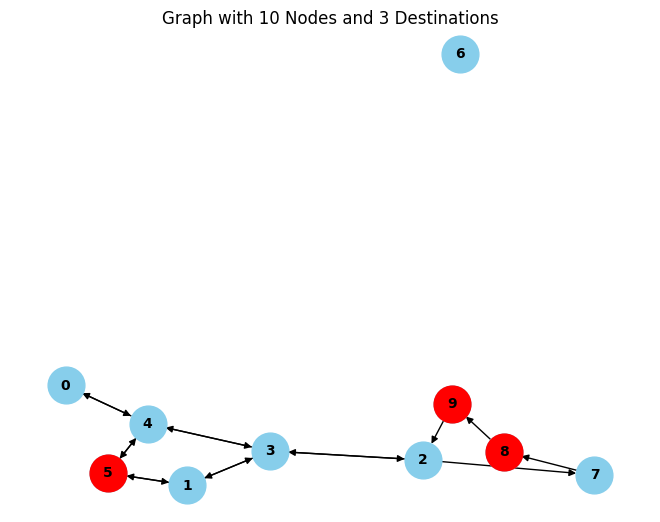

Reward Matrix:
[[ -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0. 100.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]]


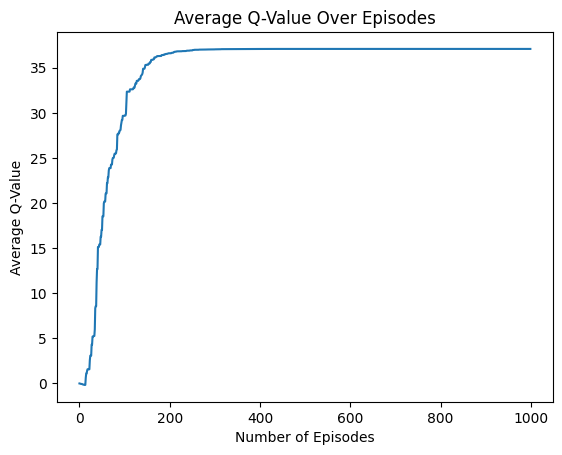


Final Q-matrix:
[[ 63.   79.   63.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   64.   79.   -1.   62.2  80.   -1.   -1. ]
 [ 63.   80.   64.   63.   80.   -1.   62.2  79.   -1.   -1. ]
 [ 64.   79.   63.   64.   79.  100.   62.2  79.   -1.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.   -1.   -1. ]
 [ 63.   79.   63.   63.   79.   -1.   62.2  79.  100.   -1. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]]

Starting node is not part of any edge. No path detected.


In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_nodes = 10
G.add_nodes_from(range(num_nodes))

# Add edges based on your description
edges = [(1, 3), (1, 5), (2, 3), (0, 4), (4, 0), (3, 2), (3, 1), (5, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 5),
         (2, 7), (7, 8), (8, 9), (9, 2)]
G.add_edges_from(edges)

# Specify destination nodes
destination_nodes = [5, 9, 8]

# Get the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Initialize the reward matrix with -1 as null values
reward_matrix = np.full_like(adjacency_matrix, -1, dtype=float)

# Update the reward matrix based on existing edges
for edge in edges:
    start_node, end_node = edge
    action_column = end_node
    state_row = start_node
    if end_node in destination_nodes:
        reward_matrix[state_row, action_column] = 100
    else:
        reward_matrix[state_row, action_column] = 0

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=10)
nx.draw_networkx_nodes(G, pos, nodelist=destination_nodes, node_color="red", node_size=700)
plt.title("Graph with 10 Nodes and 3 Destinations")
plt.show()

# Print the reward matrix
print("Reward Matrix:")
print(reward_matrix)

# Define the number of states and actions
num_states = num_nodes
num_actions = num_nodes

# Initialize the Q-matrix with zeros
Q_matrix = np.zeros((num_states, num_actions))

# Number of episodes (you can adjust this based on your requirements)
num_episodes = 1000

# Q-learning parameters
learning_rate = 0.8
discount_factor = 0.8

# List to store the Q-matrix after each episode
q_matrix_episodes = []
average_q_values = []

# Q-learning algorithm
for episode in range(num_episodes):
    current_state = random.randint(0, num_states - 1)

    while current_state not in destination_nodes:
        action_taken = random.randint(0, num_actions - 1)
        next_state = action_taken

        Q_matrix[current_state, action_taken] = (1 - learning_rate) * Q_matrix[current_state, action_taken] + \
                                                 learning_rate * (reward_matrix[current_state, action_taken] +
                                                                 discount_factor * np.max(Q_matrix[next_state, :]))

        current_state = next_state

    q_matrix_episodes.append(np.copy(Q_matrix))
    average_q_values.append(np.mean(Q_matrix))

# Plot the average Q-value over all states over episodes
plt.plot(range(num_episodes), average_q_values)
plt.xlabel("Number of Episodes")
plt.ylabel("Average Q-Value")
plt.title("Average Q-Value Over Episodes")
plt.show()

# Print the final Q-matrix after training
print("\nFinal Q-matrix:")
print(Q_matrix)

# Find the best path to one of the destination nodes
starting_node = 6  # Specify the starting node

#=========================================================
#------------------------DELETED--------------------------
#=========================================================
# current_state = starting_node
# path = [current_state]

# while current_state not in destination_nodes:
#     action_taken = np.argmax(Q_matrix[current_state, :])
#     next_state = action_taken
#     path.append(next_state)
#     current_state = next_state

# # Print the best path
# print("\nBest path from node {} to one of the destinations:".format(starting_node), path)
#=========================================================
#=========================================================


if starting_node in destination_nodes:
    print("\nStarting node is a destination. No path detected.")
elif starting_node not in [edge[0] for edge in edges] and starting_node not in [edge[1] for edge in edges]:
    print("\nStarting node is not part of any edge. No path detected.")
else:
    current_state = starting_node
    path = [current_state]

    while current_state not in destination_nodes:
        action_taken = np.argmax(Q_matrix[current_state, :])
        next_state = action_taken
        path.append(next_state)
        current_state = next_state

    # Print the best path
    print("\nBest path from node {} to one of the destinations:".format(starting_node), path)